In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_data = np.linspace(0.0,10.0,1000000)

In [ ]:
noise = np.random.randn(len(x_data))

In [ ]:
noise

array([ 1.65469849, -1.03796786, -0.59589087, ..., -0.57141657,
       -1.22736356, -0.2867963 ])

In [ ]:
y_true = (0.5*x_data)+5+noise

In [ ]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [ ]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [ ]:
my_data = pd.concat([x_df,y_df], axis=1)

In [ ]:
my_data.head()

,X Data,Y
0,0.00000,6.654698
1,0.00001,3.962037
2,0.00002,4.404119
3,0.00003,4.200046
4,0.00004,4.991240


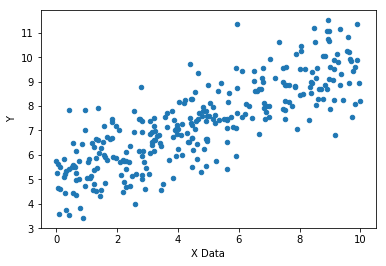

In [ ]:
my_data.sample(n=300).plot(kind='scatter', x='X Data', y='Y')

In [ ]:
batch_size=16

In [ ]:
m=tf.Variable(3.0)

In [ ]:
b=tf.Variable(3.0)

In [ ]:
xph=tf.placeholder(tf.float32,[batch_size])

In [ ]:
yph=tf.placeholder(tf.float32,[batch_size])

In [ ]:
y_model=m*xph+b

In [ ]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [ ]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(error)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    batches = 15
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [ ]:
model_m

-902811500000000.0

In [ ]:
model_b

-126890730000000.0

In [ ]:
y_hat = (model_m*x_data)+model_b

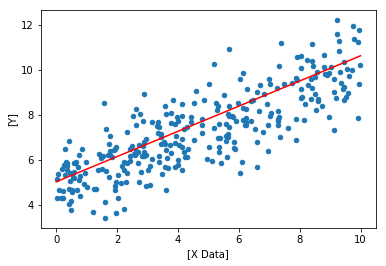

In [ ]:
my_data.sample(n=300).plot(kind='scatter', x=['X Data'],y=['Y'])
plt.plot(x_data,y_hat,'r')